In [6]:
%load_ext autoreload

In [7]:
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlpremier.cnn.preprocess import generate_cnn_data, split_preprocess_cnn_data
from mlpremier.cnn.model import build_train_cnn
from mlpremier.cnn.evaluate import gridsearch_analysis
import tensorflow as tf
import random


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22'], Position: DEF =======
Dropping Players with Avg. Playtime < 15...

Total players of type DEF = 490.
202 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (9878, 5).
Generated combined features dataframe for preprocessing of shape: (10742, 5).

========== EDA ==========
Selected Statistics:
      total_points  clean_sheets  saves        bps
mean      1.899088      0.165425    0.0   9.867529
min      -7.000000      0.000000    0.0 -11.000000
max      21.000000      1.000000    0.0  63.000000
std       2.891525      0.371581    0.0  10.450109


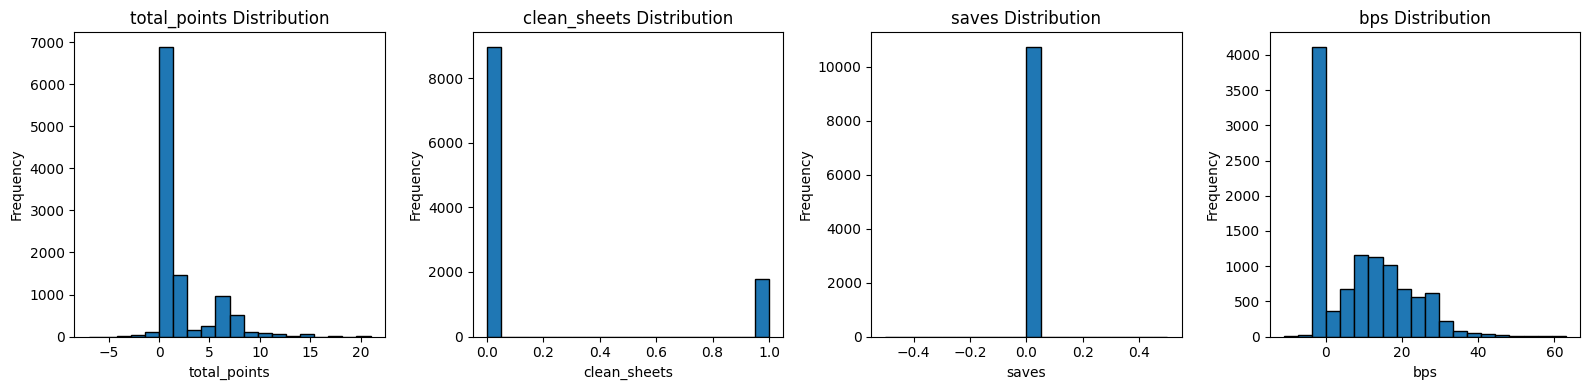

========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

Shape of windowed_df: (9878, 5)
Shape of a given window (prior to preprocessing): (3, 5)
Skill Distribution of Players:



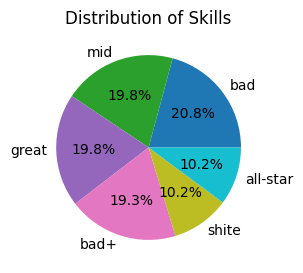

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[1.8809562  0.16220119 0.         9.96550618]

Standard Deviation of Standard Scaler:
[ 2.84211157  0.36863527  1.         10.31315839]
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

====== Building CNN Architecture ======
====== Done Building CNN Architecture ======
Epoch 1/1000
180/180 [==============================] - 0s 1ms/step - loss: 8.1908 - mae: 1.9190 - val_loss: 8.0852 - val_mae: 1.9843
Epoch 2/1000
180/180 [==============================] - 0s 732us/step - loss: 7.6854 - mae: 1.9332 - val_loss: 7.9602 - val_mae: 1.9044
Epoch 3/1000
180/180 [==============================] - 0s 780us/step - loss: 7.5834 - mae: 1.9192 - val_loss: 7.9310 - val_mae: 1.9242
Epoch 4/1000
180/180 [==============================] - 0s 749us/step - loss: 7.5373 - mae: 1.9237 - val_loss: 7.8522 - val_mae: 1.9737
Epoch 5/1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 7.5541605949401855, Test Mean Absolute Error (MAE): 1.9395393133163452


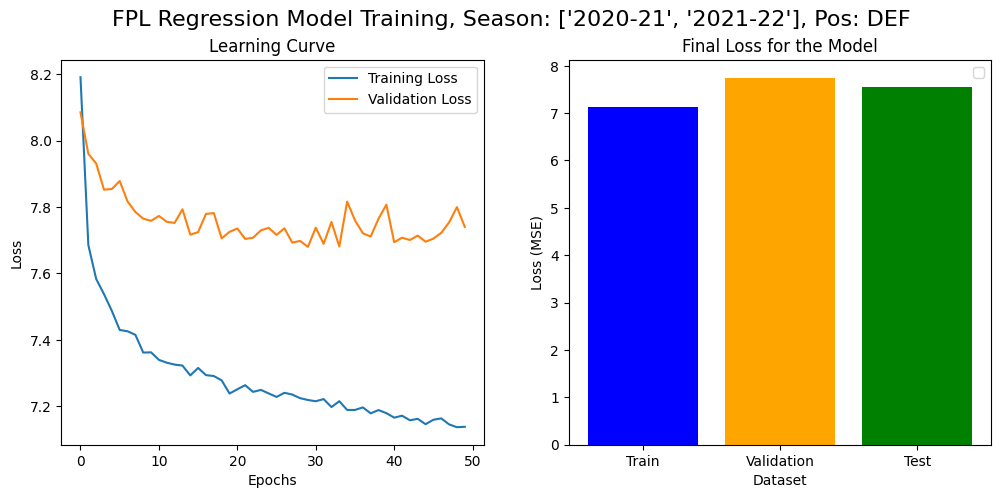

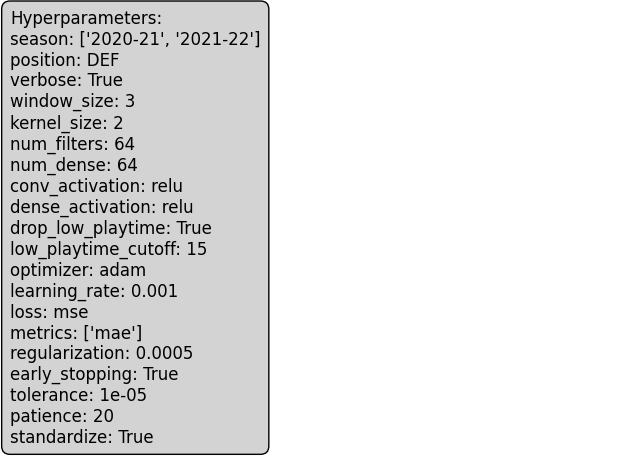

(<keras.src.engine.sequential.Sequential at 0x2c6cb8070>,
 {'season': ['2020-21', '2021-22'],
  'position': 'DEF',
  'train_mse': 7.122589588165283,
  'train_mae': 1.949203372001648,
  'val_mse': 7.740184307098389,
  'val_mae': 2.0135815143585205,
  'test_mse': 7.5541605949401855,
  'test_mae': 1.9395393133163452,
  'verbose': True,
  'window_size': 3,
  'kernel_size': 2,
  'num_filters': 64,
  'num_dense': 64,
  'conv_activation': 'relu',
  'dense_activation': 'relu',
  'drop_low_playtime': True,
  'low_playtime_cutoff': 15,
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'loss': 'mse',
  'metrics': ['mae'],
  'regularization': 0.0005,
  'early_stopping': True,
  'tolerance': 1e-05,
  'patience': 20,
  'standardize': True})

In [21]:
STANDARD_NUM_FEATURES = ['minutes', 'goals_scored', 'assists', 'goals_conceded',
                          'clean_sheets', 'bps', 'yellow_cards', 'red_cards', 
                          'own_goals', 'saves', 'penalties_missed', 'penalties_saved',
                          'ict_index', 'total_points']
STANDARD_CAT_FEATURES = []
SEED = 229

random.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

build_train_cnn(DATA_DIR,
                season = ['2020-21', '2021-22'], 
                position = 'DEF', 
                window_size=3,
                kernel_size=2,
                num_filters=64,
                num_dense=64,
                batch_size = 32,
                epochs = 1000,  
                drop_low_playtime = True,
                low_playtime_cutoff = 15,
                num_features = ['total_points', 'clean_sheets', 'saves', 'bps'],
                cat_features = STANDARD_CAT_FEATURES, 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.0005, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                standardize= True,)

# GridSearch for Best Model

In [11]:
from mlpremier.cnn.experiment import gridsearch_cnn

gridsearch_cnn(epochs=100, verbose=False)

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 4.4491 - mae: 0.9632 - val_loss: 3.4063 - val_mae: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 924us/step - loss: 3.6519 - mae: 0.9348 - val_loss: 3.3650 - val_mae: 1.1013
Epoch 3/100
47/47 [==============================] - 0s 878us/step - loss: 3.5257 - mae: 0.9329 - val_loss: 3.2219 - val_mae: 0.7165
Epoch 4/100
47/47 [==============================] - 0s 867us/step - loss: 3.5422 - mae: 0.9134 - val_loss: 3.1024 - val_mae: 0.8221
Epoch 5/100
47/47 [==============================] - 0s 893us/step - loss: 3.3814 - mae: 0.9086 - val_loss: 3.5800 - val_mae: 1.0960
Epoch 6/100
47/47 [==============================] - 0s 835us/step - loss: 3.3686 - mae: 0.9070 - val_loss: 3.3085 - val_mae: 0.8281
Epoch 7/100
47/47 [==============================] - 0s 834us/step - loss: 3.4349 - mae: 0.9239 - val_loss: 3.0727 - val_mae: 0.7983
Epoch 8/100
47/47 [==============================] - 0s 830us/step - lo

## Investigate GridSearch Results

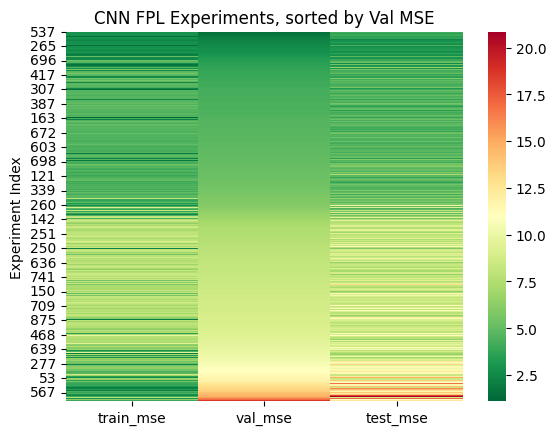


Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,6,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
DEF,2020-21,DEF,9,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
MID,2021-22,MID,6,1,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
FWD,2020-21,FWD,9,1,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True



Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,3.017067,1.354558,3.231826
DEF,4.899445,3.858049,4.501652
MID,5.071956,3.148513,4.797949
FWD,5.450167,3.623432,4.579809


In [18]:
gridsearch_analysis('results/gridsearch_v4.csv', eval_top=1)